# LeetCode: [Reverse LinkedList](https://leetcode.com/problems/reverse-linked-list/)

__Difficulty: Easy__

__Data Structure(s): Classes/Object__

<hr>

### Description:

Given the head of a singly linked list, reverse the list, and return the reversed list.


Example 1:

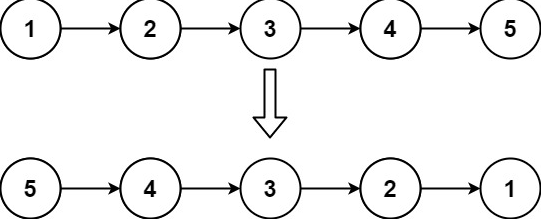

> Input: head = [1,2,3,4,5]<br>Output: [5,4,3,2,1]

<br>

Example 2:

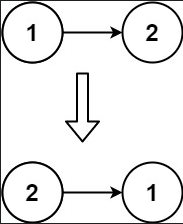

> Input: head = [1,2]<br>Output: [2,1]

<br>

Example 3:
> Input: head = []<br>Output: []
 

Constraints:
* The number of nodes in the list is the range [0, 5000].
* `-5000 <= Node.val <= 5000`

 

Follow up: A linked list can be reversed either iteratively or recursively. Could you implement both?

<hr>

### *Brainstorming:*

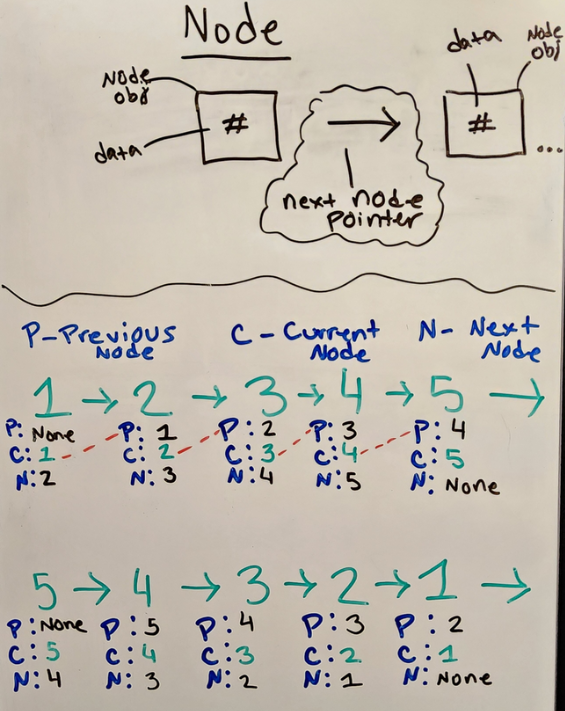

In [2]:
p = 0
c = 1
n = 2
temp = None

print(f"Original: {p} --> {c} --> {n}")

temp = p
p = n
n = temp

print(f"Reversed: {p} --> {c} --> {n}")

Original: 0 --> 1 --> 2
Reversed: 2 --> 1 --> 0


*Iterative Attempt:*

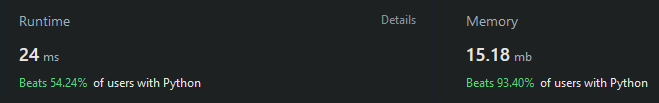


*Recursive Attempt:*
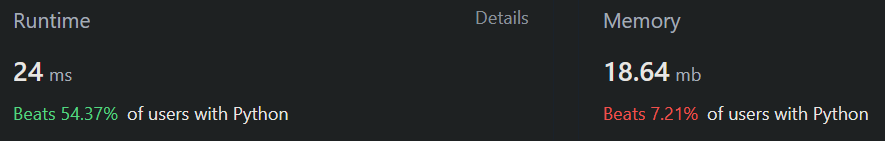

In [1]:
class Node:
    data = None
    nextNode = None

    def __init__(self, data):
        self.data = data



class LinkedList:
    def __init__(self):
        self.head = None

    
    def isEmpty(self):
        return self.head == None

    
    def prependNode(self, data):
        newNode = Node(data)
        newNode.nextNode = self.head

        # update new head node
        self.head = newNode


    def appendNode(self, data):
        if self.isEmpty():
            self.prependNode(data)

        else:
            current = self.head

            newNode = Node(data)

            while current != None:
                if current.nextNode == None:
                    current.nextNode = newNode
                    break

                # keep looping until we reach the end (a node that doesn't have a nextNode)
                current = current.nextNode


    def reverseIterative(self):
        if self.head == None:
            return None
        
        current = self.head
        previous = None
        nextPlaceholder = None

        while current != None:
            ## NEXT NODE: used as a placeholder for the current iteration in order to traverse through the LinkedList
            ## PREVIOUS NODE: used as a placeholder for the next iteration in order to perform the pointer swap

            nextPlaceholder = current.nextNode # temporarily hold pre-swapped next node
            current.nextNode = previous # swap next node pointer (current node now points to previous node)
            previous = current # will be used to swap the next node pointer on the next iteration
            
            # traverse the remaining nodes using next node placeholder
            current = nextPlaceholder 


        # after while loop finishes, update head node w/ previous/last node
        self.head = previous

        # return previous


    def reverseRecursive(self, headNode: Node):
        if self.head == None:
            return None
        
        current = headNode
        nextPlaceholder = None

        if current.nextNode != None:
            self.reverseRecursive(current.nextNode)

            nextPlaceholder = current.nextNode
            current.nextNode = None
            nextPlaceholder.nextNode = current

        else:
            self.head = current


    def reverseRecursiveLeetCodeSolution(self, headNode: Node):
        """
        The LeetCode implementation doesn't seem to have a self.head property, so this is what it wants I guess...
        """
        if headNode == None:
            return None
        
        current = headNode

        if current.nextNode != None:
            # e.g. 50
            current = self.reverseRecursiveLeetCodeSolution(current.nextNode) 

            # e.g. 40 -> 50 -> None = 40    --->    50 -> 40
            headNode.nextNode.nextNode = headNode
        
        # e.g 40 -> None
        headNode.nextNode = None 
        
        return current




    def __repr__(self) -> str:
        if self.isEmpty():
            return "LinkedList is empty"
        
        outputStr = ""

        current = self.head

        while current != None:
            ## HEAD
            if current == self.head:
                outputStr += f"[HEAD: {current.data}] --> "

            ## TAIL
            elif current.nextNode == None:
                outputStr += f"[TAIL: {current.data}]"

            ## REMAINING NODES
            else:
                outputStr += f"{current.data} --> "

            current = current.nextNode

        return outputStr


In [4]:
nums = LinkedList()
nums

LinkedList is empty

In [5]:
nums.appendNode(10)
nums.appendNode(20)
nums.appendNode(30)
nums.appendNode(40)
nums.appendNode(50)

nums

[HEAD: 10] --> 20 --> 30 --> 40 --> [TAIL: 50]

In [6]:
nums.reverseIterative()
nums

[HEAD: 50] --> 40 --> 30 --> 20 --> [TAIL: 10]

In [7]:
nums2 = LinkedList()
nums2.appendNode(10)
nums2.appendNode(20)
nums2.appendNode(30)
nums2.appendNode(40)
nums2.appendNode(50)

nums2.reverseRecursive(nums2.head)
nums2

[HEAD: 50] --> 40 --> 30 --> 20 --> [TAIL: 10]

*works w/ LeetCode's weird LinkedList implementation, but not with mine (standard implementation)*

In [2]:
nums3 = LinkedList()
nums3.appendNode(10)
nums3.appendNode(20)
nums3.appendNode(30)
nums3.appendNode(40)
nums3.appendNode(50)

nums3.reverseRecursiveLeetCodeSolution(nums3.head)
nums3

[HEAD: 10] --> 